In [1]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
N = 50
D = 50

In [5]:
# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10
# X = (np.random.randn(N, D) - 0.5)*10

In [6]:
# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))

In [7]:
# generate Y - add noise with variance 0.5
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))

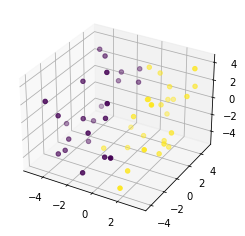

In [8]:
# let's plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

In [9]:
# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 3.0 # try different values - what effect does it have on w?
for t in range(5000):
    # update w
    Yhat = sigmoid(X.dot(w))
    delta = Yhat - Y
    w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))

    # find and store the cost
    cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1 - Yhat)).mean() + l1*np.abs(w).mean()
    costs.append(cost)

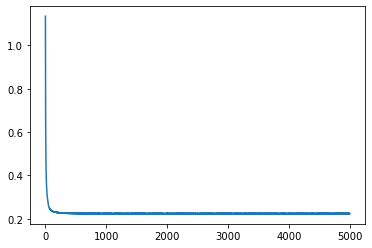

In [10]:
# plot the costs
plt.plot(costs)
plt.show()

In [11]:
print("final w:", w)

final w: [ 1.14727944e+00  1.24172851e-01 -1.83116020e-01 -9.47360419e-04
 -9.93252313e-04  4.90949998e-02 -4.30032604e-02 -2.24640947e-03
  3.36881330e-04  2.40738271e-05  3.25356987e-03  1.14348108e-01
  4.20837796e-02  5.31958192e-04 -1.58996033e-03  1.06798633e-03
 -4.45938883e-04 -2.38972063e-04  3.00093526e-03 -9.12898615e-04
 -1.22427990e-03 -1.55628602e-03 -2.00299176e-03 -2.11782018e-03
 -6.00039617e-04 -2.19329057e-05 -8.23914930e-04  1.20173744e-03
 -1.49657529e-03 -3.45607563e-02 -4.60812398e-03  4.89233387e-03
  9.52125025e-04 -1.11959268e-03  5.65696801e-02  8.12124110e-02
  1.22868235e-04 -1.05449839e-03 -1.14208338e-03 -3.41512763e-02
 -9.10465854e-05  3.28966670e-03  6.09708649e-02 -8.25604419e-04
 -2.13757216e-01  2.43420054e-01 -1.93298792e-03 -3.90439177e-04
  2.15559178e-03  1.62967342e-03]


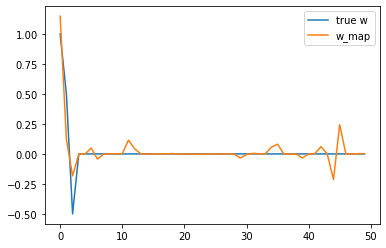

In [12]:
# plot our w vs true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()